## Figure 8 (Journal of Climate submission; Molina et al.)

The local wavelet power spectrum for the Niño 3.4 region area weighted average seasonal SSTs (DJF,MAM, JJA, and SON) using the Morlet wavelet (as in Torrence and Compo 1998) for the CESM1 control (a)and sensitivity experiments (b-f). 100 years of the CESM1 control were added to the start of each time series topad years prior to the sensitivity experiment responses to AMOC and PMOC.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 

import xarray as xr
import pandas as pd
import numpy as np
from climatico import enso
from climatico.util import weighted_mean
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import subprocess
import copy
import matplotlib as mpl

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'

In [4]:
nino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)

In [5]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
first100_ssts = weighted_mean(ds['SST'], lat_name='lat')

In [6]:
# control wavelet
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
control_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
control_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                          control_ssts.sel(time=slice('0800-02-01 00:00:00', '1599-12-31 00:00:00'))], dim='time')
control_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
control_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_control = copy.deepcopy(w_array['w'].squeeze().values)
p_control = copy.deepcopy(w_array['w'].attrs['period'])
pow_control = copy.deepcopy(power_array['power'].squeeze().values)
sig_control = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

In [7]:
# g02sv
ds = xr.open_mfdataset(f'{directory_data}{file_g02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g02sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
g02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
g02sv_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_g02sv = copy.deepcopy(w_array['w'].squeeze().values)
p_g02sv = copy.deepcopy(w_array['w'].attrs['period'])
pow_g02sv = copy.deepcopy(power_array['power'].squeeze().values)
sig_g02sv = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

In [8]:
# g04sv
ds = xr.open_mfdataset(f'{directory_data}{file_g04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g04sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
g04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
g04sv_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_g04sv = copy.deepcopy(w_array['w'].squeeze().values)
p_g04sv = copy.deepcopy(w_array['w'].attrs['period'])
pow_g04sv = copy.deepcopy(power_array['power'].squeeze().values)
sig_g04sv = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

In [9]:
# p02sv
ds = xr.open_mfdataset(f'{directory_data}{file_p02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p02sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
p02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
p02sv_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_p02sv = copy.deepcopy(w_array['w'].squeeze().values)
p_p02sv = copy.deepcopy(w_array['w'].attrs['period'])
pow_p02sv = copy.deepcopy(power_array['power'].squeeze().values)
sig_p02sv = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

In [10]:
# p04sv
ds = xr.open_mfdataset(f'{directory_data}{file_p04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p04sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
p04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
p04sv_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_p04sv = copy.deepcopy(w_array['w'].squeeze().values)
p_p04sv = copy.deepcopy(w_array['w'].attrs['period'])
pow_p04sv = copy.deepcopy(power_array['power'].squeeze().values)
sig_p04sv = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

In [11]:
# psalt
ds = xr.open_mfdataset(f'{directory_data}{file_psalt}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
psalt_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
psalt_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        psalt_ssts.sel(time=slice('0001-02-01 00:00:00', '0299-12-31 00:00:00'))], dim='time')
psalt_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0399-12-31 00:00:00", freq="MS", calendar="noleap")
# save ssts array for wavelet analysis
psalt_ssts.resample(time='QS-DEC').mean().to_dataset(name='SST').to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/ssts_file.nc')
# run wavelet script
subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/wavelets.ncl'], shell=True)
# open wavelet array
w_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_ncl.nc")
power_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_power.nc")
sig_array = xr.open_dataset("~/python_scripts/climatico/ncl/wave_significance.nc")
# deep copy
w_psalt = copy.deepcopy(w_array['w'].squeeze().values)
p_psalt = copy.deepcopy(w_array['w'].attrs['period'])
pow_psalt = copy.deepcopy(power_array['power'].squeeze().values)
sig_psalt = copy.deepcopy(sig_array['SIG'].squeeze().values)
# close file/remove object assignment
del w_array
del power_array
del sig_array

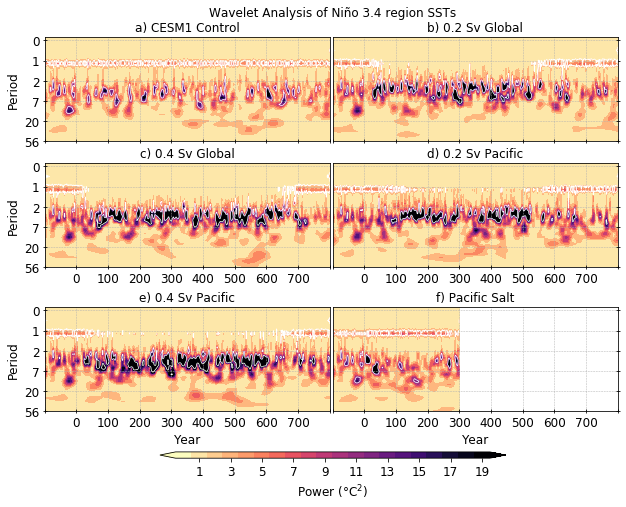

In [12]:
# -------------- create figure

lw = 0.75

fig = plt.figure(figsize=(8,5))
fig.suptitle(u'Wavelet Analysis of Niño 3.4 region SSTs', x=0.5, y=1.075, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.7, 0.495, 0.29])

ax1.set_title('a) CESM1 Control', fontsize=12)

ax1.contourf(*np.meshgrid(np.arange(0,pow_control.shape[1]),np.arange(0,p_control[:32].shape[0])),
            (pow_control[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax1.contour(*np.meshgrid(np.arange(0,sig_control.shape[1]),np.arange(0,p_control[:32].shape[0])),
           (sig_control[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax1.set_yticks(np.arange(0,p_control[:32].shape[0])[::6])
ax1.set_yticklabels(np.around(p_control[:32][::-1][::6]).astype('int'), fontsize=12)

ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax1.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax1.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax1.grid(alpha=0.95, ls='--', lw=0.5)

ax1.set_ylabel('Period', fontsize=12)

# --------------

ax2 = plt.axes([0.5, 0.7, 0.495, 0.29])

ax2.set_title('b) 0.2 Sv Global', fontsize=12)

ax2.contourf(*np.meshgrid(np.arange(0,pow_g02sv.shape[1]),np.arange(0,p_g02sv[:32].shape[0])),
            (pow_g02sv[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax2.contour(*np.meshgrid(np.arange(0,sig_g02sv.shape[1]),np.arange(0,p_g02sv[:32].shape[0])),
           (sig_g02sv[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax2.set_yticks(np.arange(0,p_g02sv[:32].shape[0])[::6])
ax2.set_yticklabels(np.around(p_g02sv[:32][::-1][::6]).astype('int'), fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, direction='inout', labelbottom=False)
ax2.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax2.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax2.grid(alpha=0.95, ls='--', lw=0.5)

#ax2.set_ylabel('Period', fontsize=12)

# --------------

ax3 = plt.axes([0., 0.35, 0.495, 0.29])

ax3.set_title('c) 0.4 Sv Global', fontsize=12)

ax3.contourf(*np.meshgrid(np.arange(0,pow_g04sv.shape[1]),np.arange(0,p_g04sv[:32].shape[0])),
            (pow_g04sv[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax3.contour(*np.meshgrid(np.arange(0,sig_g04sv.shape[1]),np.arange(0,p_g04sv[:32].shape[0])),
           (sig_g04sv[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax3.set_yticks(np.arange(0,p_g04sv[:32].shape[0])[::6])
ax3.set_yticklabels(np.around(p_g04sv[:32][::-1][::6]).astype('int'), fontsize=12)
ax3.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True)
ax3.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax3.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax3.grid(alpha=0.95, ls='--', lw=0.5)

#ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Period', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0.35, 0.495, 0.29])

ax4.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax4.contourf(*np.meshgrid(np.arange(0,pow_p02sv.shape[1]),np.arange(0,p_p02sv[:32].shape[0])),
            (pow_p02sv[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax4.contour(*np.meshgrid(np.arange(0,sig_p02sv.shape[1]),np.arange(0,p_p02sv[:32].shape[0])),
           (sig_p02sv[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax4.set_yticks(np.arange(0,p_p02sv[:32].shape[0])[::6])
ax4.set_yticklabels(np.around(p_p02sv[:32][::-1][::6]).astype('int'), fontsize=12)
ax4.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, direction='inout', labelbottom=True)
ax4.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax4.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax4.grid(alpha=0.95, ls='--', lw=0.5)

#ax4.set_xlabel('Year', fontsize=12)
#ax4.set_ylabel('Period', fontsize=12)

# --------------

ax5 = plt.axes([0., -0.05, 0.495, 0.29])

ax5.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax5.contourf(*np.meshgrid(np.arange(0,pow_p04sv.shape[1]),np.arange(0,p_p04sv[:32].shape[0])),
            (pow_p04sv[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax5.contour(*np.meshgrid(np.arange(0,sig_p04sv.shape[1]),np.arange(0,p_p04sv[:32].shape[0])),
           (sig_p04sv[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax5.set_yticks(np.arange(0,p_p04sv[:32].shape[0])[::6])
ax5.set_yticklabels(np.around(p_p04sv[:32][::-1][::6]).astype('int'), fontsize=12)
ax5.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True)
ax5.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax5.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax5.grid(alpha=0.95, ls='--', lw=0.5)

ax5.set_xlabel('Year', fontsize=12)
ax5.set_ylabel('Period', fontsize=12)

# --------------

ax6 = plt.axes([0.5, -0.05, 0.495, 0.29])

ax6.set_title('f) Pacific Salt', fontsize=12)

ax6.contourf(*np.meshgrid(np.arange(0,pow_psalt.shape[1]),np.arange(0,p_psalt[:32].shape[0])),
            (pow_psalt[:32,:][::-1]), 
            cmap='magma_r', levels=[0,2,4,6,8,10,12,14,16,18,20], vmin=0, vmax=20, extend='both')

ax6.contour(*np.meshgrid(np.arange(0,sig_psalt.shape[1]),np.arange(0,p_psalt[:32].shape[0])),
           (sig_psalt[:32,:][::-1]), 
           levels=[0,1], colors='w', linewidths=lw)

ax6.set_yticks(np.arange(0,p_psalt[:32].shape[0])[::6])
ax6.set_yticklabels(np.around(p_psalt[:32][::-1][::6]).astype('int'), fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, direction='inout', labelbottom=True)
ax6.set_xticks([0,100*4,200*4,300*4,400*4,500*4,600*4,700*4,800*4,900*4])
ax6.set_xticklabels(['',0,100,200,300,400,500,600,700,''], fontsize=12)
ax6.grid(alpha=0.95, ls='--', lw=0.5)

ax6.set_xlabel('Year', fontsize=12)
#ax6.set_ylabel('Period', fontsize=12)

# --------------


cbar_ax = fig.add_axes([0.2, -0.18, 0.6, 0.0175])

cmap = plt.cm.get_cmap('magma_r', 20)
norm = mpl.colors.Normalize(vmin=0, vmax=20)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                #ticks=[0,1,2,3,4,5,6,7],
                                extend='both')

a = u"\u00b0"
cb1.set_label(r'Power ('+a+'C$^{2}$)', fontsize=12)
labels = np.arange(0,20,1)[1::2]
loc    = labels + .5
cb1.set_ticks(loc)
cb1.ax.set_xticklabels(np.arange(0,20,1)[1::2])
cb1.ax.tick_params(labelsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig8.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------